# Temporal and Spatial DataMining
## Exercise 03 Representation

In [6]:
import sys

import scipy.optimize

sys.path.insert(0, './utils')
import matplotlib.pyplot as plt
import numpy as np

### Task1: Piecewise Aggregate Approximation PAA

PAA approximates a time-series X of length n into vector $\bar{X}=(\bar{x}_{1},…,\bar{x}_{M})$ of any arbitrary length $M \leq n$ where each of $\bar{x_{i}}$ is calculated as follows:

$$\bar{x}_{i} = \frac{M}{n}\sum_{j=n/M(i-1)+1}^{(n/M)i} x_{j}$$

**a)** implement a PAA function for reducing the dimensionality of the time-series from n to M.

n: Number of input time series

M: Number of reduced time series

PS: **There are immediate special cases however**,

1. M>=n: The reduced series is exact copy of the original sequence.
2. M=1: The reduced series is the mean of the original sequence.

In [7]:
t = np.array([3.12, 2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])

In [8]:
def paa(arr, sections):
    sum = 0
    res = np.zeros(len(arr))
    for index in range(len(arr)):
        value = arr[index]
        sum += value
        if (index + 1) % sections == 0:
            mean = sum / sections
            for i in range(sections):
                res[index - i] = mean
                sum = 0
    if sum != 0:
        leftover = len(arr) % sections
        mean = sum / leftover
        for i in range(leftover):
            res[len(res) - 1 - i] = mean
    return res    
    

**b)** Now plot the results

**Hint**: Use [plt.step](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html) to plot the reduced time series.


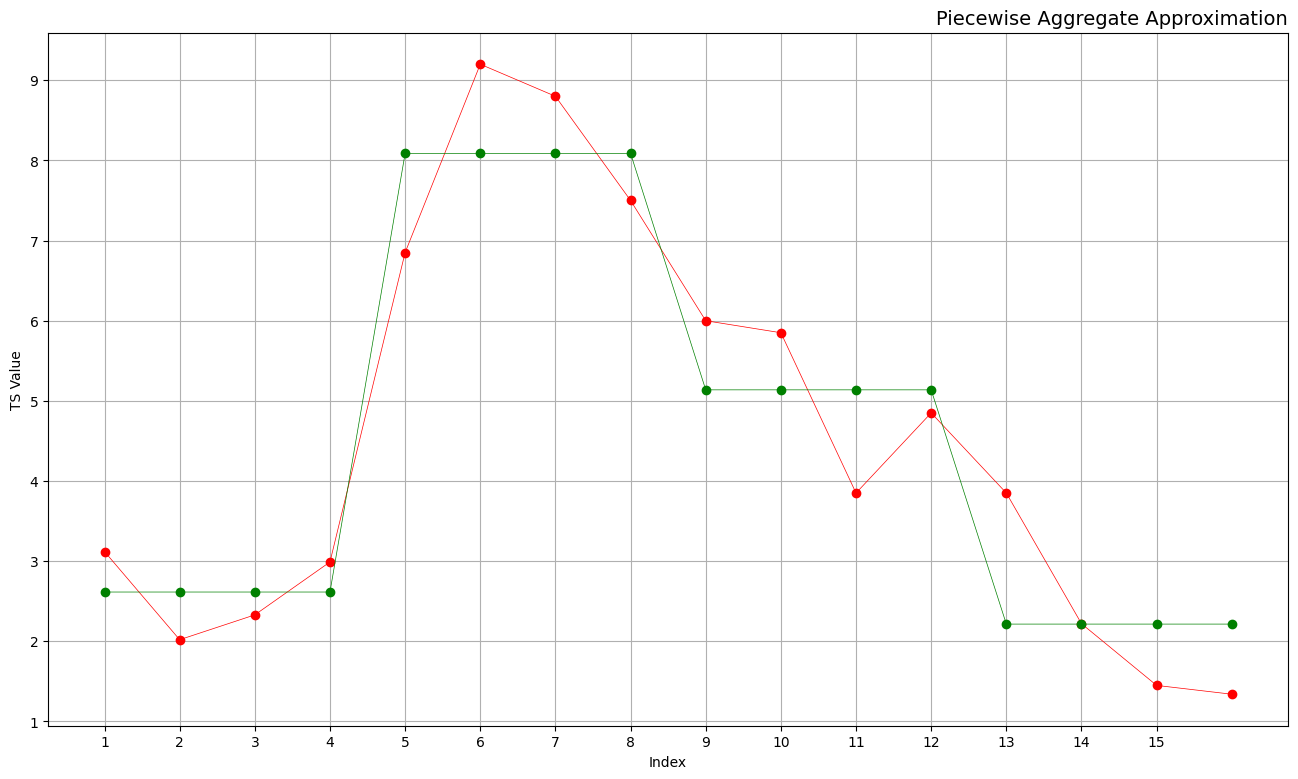

In [9]:
plt.figure(figsize=(16, 9))
plt.title("Piecewise Aggregate Approximation", size=14, loc="right")
plt.plot(range(1, len(t)+1), t, marker="o", linewidth=0.5, color="red")

# your code here
t_paa = paa(t, 4)
# end of your code

plt.plot(range(1, len(t)+1), t_paa, marker="o", linewidth=0.5, color="green")


plt.xticks(range(1, 16))
plt.xlabel("Index")
plt.ylabel("TS Value")
plt.grid(True)
plt.show()

In [10]:
res

NameError: name 'res' is not defined

### Task2: Piecewise Polynomial Approximation

**a)** Use **ppoly_data** to import data.

Suppose the data is generated in this way: x is from random normal with mean 0, std = 10. length of x is 1000

In [11]:
from sklearn.linear_model import LinearRegression
from scipy import optimize
from utils.tdm_utils import ppoly_data

In [12]:
# generate data
X, y = ppoly_data()

**b)** plot scatter of x and y

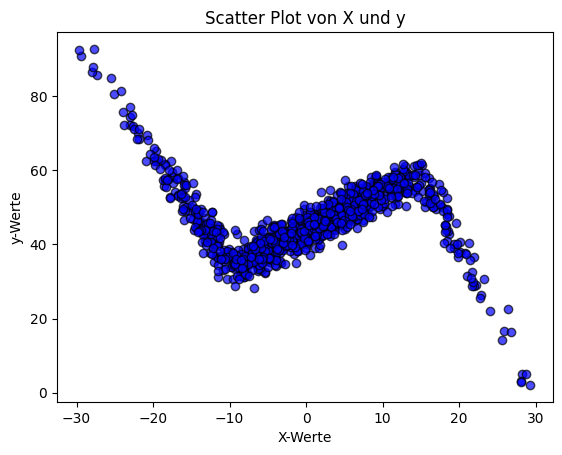

In [13]:
plt.scatter(X, y, color='blue', alpha=0.7, edgecolors='black')

# Achsentitel setzen
plt.xlabel("X-Werte")
plt.ylabel("y-Werte")
plt.title("Scatter Plot von X und y")

# Diagramm anzeigen
plt.show()

**c)** Use **[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** to fit the data and plot it. What can you observe?

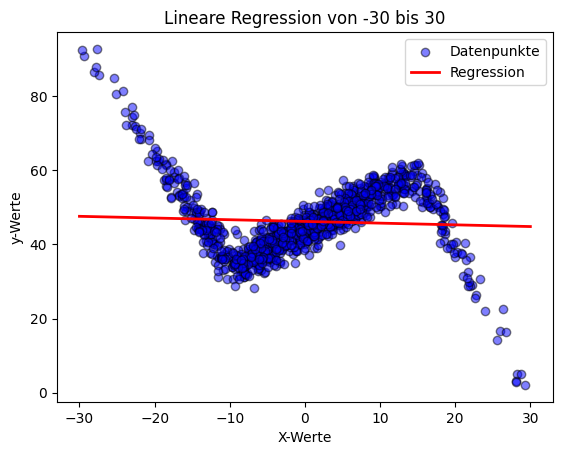

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(X).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
reg.score(X, y)

X_pred = np.arange(-30, 30.1, 0.1).reshape(-1, 1)
y_pred = reg.predict(X_pred)
plt.scatter(X, y, color='blue', alpha=0.5, edgecolors='black', label="Datenpunkte")
plt.plot(X_pred, y_pred, color='red', linewidth=2, label="Regression")
plt.xlabel("X-Werte")
plt.ylabel("y-Werte")
plt.title("Lineare Regression von -30 bis 30")

plt.legend()
plt.show()

**d)** Piecewise linear regression. Design the function **piecewise_linear** with help of [np.piecewise](https://docs.scipy.org/doc/numpy/reference/generated/numpy.piecewise.html) and [optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

**Hints:** 

1. There are 3 intervals. For each interval, a linear line will be fitted.

2. $y=b+k1×x+k2×(x-x0)|(x>x0)+k3×(x-x1)|(x>x1)$

3. You can refer to the [example](https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python)

In [15]:
def piecewise_linear(x, x0, x1, b, k1, k2, k3):
    condList = [x < x0, (x >= x0) & (x <= x1), x1 < x]
    funcList = [lambda x:b + k1 * x, lambda x:b + k1 * x + k2 * (x - x0), lambda x:b + k1 * x + k2 * (x - x0) + k3 * (x - x1)]
    return np.piecewise(x, condList, funcList)

In [16]:
p, e = optimize.curve_fit(piecewise_linear, X, y)

perr = np.sqrt(np.diag(e))
print(perr)

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [ ]:
# plot the fit function


### Task3: SAX  (Bonus task)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from tdm_utils import TS_1,TS_2

**a)** Implement SAX as discussed in the lecture using the given Interface. 

**Hint**: The argument **as_symbol** and **from_symbol** mean that the digits are encoded to character symbols, for example, '1' -- 'a', '2' -- 'b'. Refer to the built-in functions [chr()](https://www.programiz.com/python-programming/methods/built-in/chr) and [ord()](https://www.programiz.com/python-programming/methods/built-in/ord).

In [ ]:
class SAX:
    def __init__(self, symbols=5):
        """ Initialize a new approximation objection.

        Parameters:
        ===========
        symbols - number of different symbols to be used for encoding
        """
        pass
        #add fields here      
    
    def fit(self, X):
        """ Fit boundaries.

        Calculates mean and std from training data to be used in
        transform(X)
        
        Parameters:
        ===========
        X - time series do be used as source

        Return:
        =======
        reference to self
        """
        # your code here
        pass
        


    def transform(self, X, as_symbol=True):
        """
        Transform the given time series to a symbolic representation.

        Standardizes X with the parameters learned from training data.

        Arguments:
        ==========
        X - time series do be converted.

        as_symbol - boolean - whether to return the actual symbols or the indices
        """
        # your code here
        pass
    

    def reconstruct(self, S, from_symbol=True):
        """
        Reconstruct the time series from its Symbolic representation.

        Arguments:
        ==========
        S - symbolic representation of a time series

        Returns:
        ========
        Reconstructed signal from S 
        """
        # your code here
        pass

**b)** Plot the time series **TS_1** and **TS_2**. Then calculate the similarity of the time series. 

**Note**: Normalized Euclidean distance

$d=\sqrt{\sum_{n=1}^{N}\dfrac{(\mathbf{\hat{y}}_n-\mathbf{y}_n)^2}{N}}$, where $\hat{y}_{n}$ and $y_{n}$ are the $n$th measurement and prediction, respectively. $N$ is the number of samples.

In [ ]:
x,y = TS_1(x1=20, samples=300)
a,b = TS_2(x1=20, samples=300)

# plot the two time series


In [ ]:
# calculate the normalizaed Euclidean distance


**c)** Use SAX to convert the two time series into a character combination. Then reconstruct the time series and plot it with the original time series. (In a plot)

**d)** Calculate the similarity of the reconstructions with the original time series. 

**e)** Use the following time series and repeat the procedure of task **c)** and **d)**. Which problem occurs?

In [ ]:
xx,yy = TS_1(x1=200, samples=3000)
aa,bb = TS_2(x1=200, samples=3000)

**f)** Implement a function that cleans up the trend of the time series and plot it.

**Note:** Take a look at the Numpy function **polyfit** for getting the trend.

In [ ]:
def get_trend(x, y):
    """Return the trend of the given time series."""
    # your code here
    pass

In [ ]:
# Plot them and compare the original time series and the cleaned time series.


In [ ]:
# Apply the SAX to the cleaned time series and plot them
